In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
!cp drive/MyDrive/MyProject/Data/Language_Detection.csv .
!cp drive/MyDrive/MyProject/Data/LanguageDetectionBoSung.xlsx .
# dấu chấm "." là bắt đầu chạy lệnh
# connect,lấy dữ liệu từ file Language Detection

Mounted at /content/drive


In [ ]:
import os

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=32a1fdb79f7cbec3a4f8d6d08e459c1347dd664a66c3ecadcca37acaf6b291ce
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
pip install textblob

In [ ]:
pip install panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=c012cf639a81b94619f52ee5520d96e441fb3466cfcd8b56c3099fc04ec01cf1
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [ ]:
import pandas as pd
df = pd.read_excel('/content/LanguageDetectionBoSung.xlsx')


In [ ]:
df.to_csv('LanguageDetectionBoSung.csv')
df

,Text,Language
0,ندرك أن السكتات الدماغية تحدث، وبتكرار متزايد،...,Arabic
1,يمكن أن تتطور السكتة الدماغية لدى أي شخص في أي...,Arabic
2,هناك الكثير من الأشياء التي يمكنك القيام بها ل...,Arabic
3,مرحبًا\n,Arabic
4,يمكنك أيضًا استخدام الأدوات والتقنيات لمساعدتك...,Arabic
...,...,...
67,"Обычно предполагается, что одаренные люди во в...",Russian
68,В этом году хадж в Мекку проходил в экстремаль...,Russian
69,"Тела погибших все еще необходимо исследовать, ...",Russian
70,Привет,Russian


In [ ]:
!cp LanguageDetectionBoSung.csv drive/MyDrive/MyProject/Data
# lưu file csv mới vào folder data

In [ ]:
def read_csv_with_encoding(file_path, encodings=['utf-8', 'latin1', 'utf-16']):
    for encoding in encodings:
        try:
            return pd.read_csv(file_path, encoding=encoding)
        except UnicodeDecodeError:
            continue
    raise ValueError(f"None of the specified encodings worked for {file_path}")

df1 = read_csv_with_encoding("LanguageDetectionBoSung.csv")
df2 = read_csv_with_encoding("Language_Detection.csv")

# Merge the dataframes
merged_df = pd.concat([df1, df2])

merged_file = 'Language_Detection_new.csv'
merged_df.to_csv(merged_file, index=False)

print(f"Merged file saved as {merged_file}")
# mã hóa khác nhau --> lỗi

Merged file saved as Language_Detection_new.csv


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
# Tải tập dữ liệu
data = pd.read_csv("Language_Detection_new.csv")
# Đếm số lượng giá trị cho mỗi ngôn ngữ
print(data['Language'].value_counts())
# Tách các biến độc lập và phụ thuộc
X = data["Text"]
y = data["Language"]
# Chuyển đổi các biến đã phân loại thành số
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# Tạo danh sách để nối văn bản đã xử lý tách trước đó
data_list = []
# Vòng lặp xử lý tất cả các văn bản
for text in X:
    # Loại bỏ các ký hiệu và số
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', str(text))
    text = re.sub(r'[[]]', ' ', str(text))
    # Chuyển văn bản thành chữ thường, không in hoa
    text = text.lower()
    # Thêm văn bản đã xử lý vào data list đã tạo trước đó
    data_list.append(text)
# Tạo túi từ bằng cách sử dụng countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
#Thử nghiệm training dữ liệu test, tập test là 1/5 dữ liệu đưa vào, còn lại là training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Tạo mô hình và dự đoán
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
# Dự đoán tập test
y_pred = model.predict(x_test)
# Đánh giá mô hình đã tạo
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
print(ac)
cm = confusion_matrix(y_test, y_pred)

# function for predicting language
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The language is in",lang[0])


Language
English       1385
French        1014
Spanish        819
Portugeese     739
Russian        709
Italian        698
Sweedish       676
Malayalam      611
Arabic         555
Dutch          546
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Chinese        306
Korean         176
Japanese       130
Hindi           81
Name: count, dtype: int64
0.9759637188208616


In [ ]:
# English
predict("Everyone has easy access to technology, including the elderly and those with disabilities.")
# French
predict("Tout le monde a facilement accès à la technologie, y compris les personnes âgées et les personnes handicapées.")
# Arabic
predict("يتمتع الجميع بسهولة الوصول إلى التكنولوجيا، بما في ذلك كبار السن وذوي الإعاقة.")
# Spanish
predict("Todo el mundo tiene fácil acceso a la tecnología, incluidos los ancianos y las personas con discapacidad.")
# Malayalam
predict("പ്രായമായവരും വികലാംഗരുമുൾപ്പെടെ എല്ലാവർക്കും സാങ്കേതികവിദ്യയിലേക്ക് എളുപ്പത്തിൽ പ്രവേശനമുണ്ട്.")
# Russian
predict("Каждый имеет легкий доступ к технологиям, включая пожилых людей и людей с ограниченными возможностями.")
#Korea
predict("노인과 장애인을 포함하여 모든 사람이 기술에 쉽게 접근할 수 있습니다.")
#Chinese
predict("人生，總會有不期而遇的溫暖，和生生不息的希望。 不管前方的路有多苦，只要走的方向正確，不管崎嶇不平，比站在原地更接近幸福。")
#Japanese
predict("高齢者や障害のある人を含め、誰もがテクノロジーに簡単にアクセスできます。")

The language is in English
The language is in French
The language is in Arabic
The language is in Spanish
The language is in Malayalam
The language is in Russian
The language is in English
The language is in English
The language is in English


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow import keras

In [ ]:
# Tính confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# print(matrix)

In [ ]:
# Độ dài tập train
len(x_train)

8816

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

accuracy:   0.976
Confusion matrix, without normalization


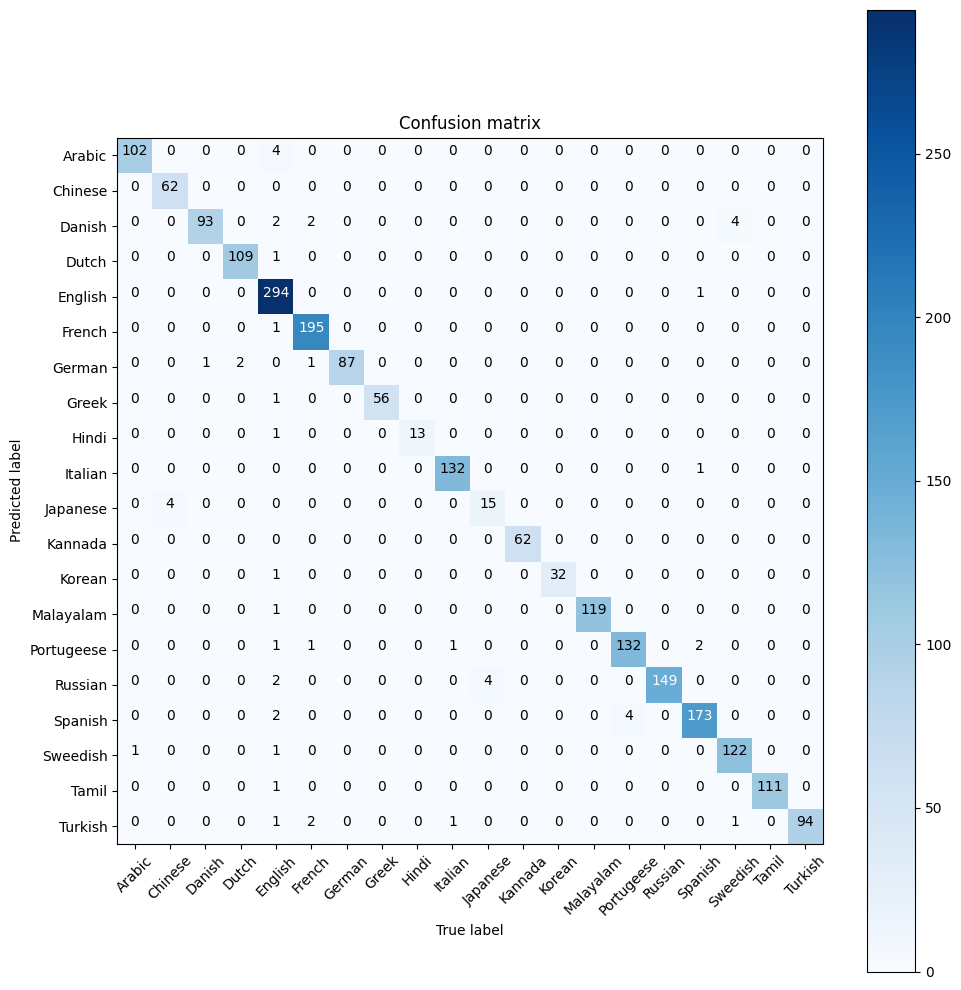

In [ ]:
# Ma trận nhầm lẫn tập test
from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_test, y_pred)
# Hiển thị độ chính xác tập test
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cm, classes =['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'French',
       'German', 'Greek', 'Hindi', 'Italian', 'Japanese', 'Kannada',
       'Korean', 'Malayalam', 'Portugeese', 'Russian', 'Spanish',
       'Sweedish', 'Tamil', 'Turkish'], ax = ax)

In [ ]:
y_pred1 = model.predict(x_train)

accuracy:   0.986
Confusion matrix, without normalization


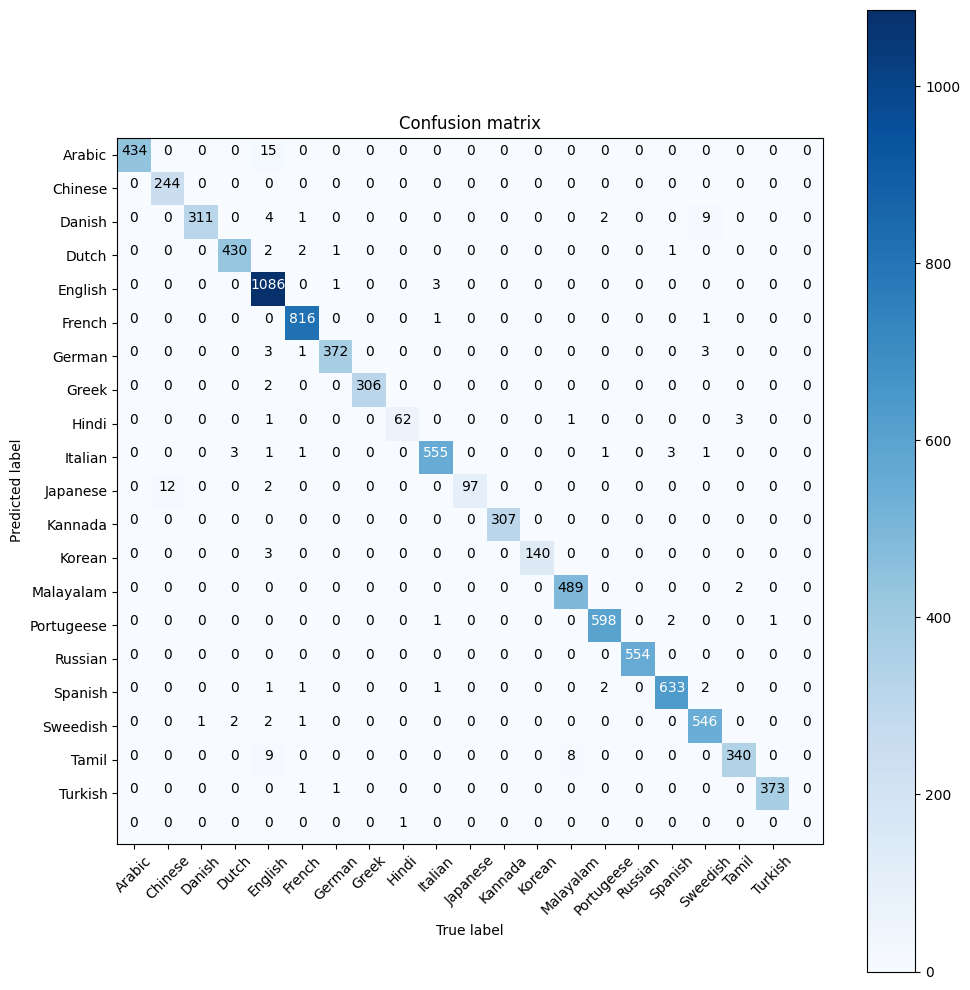

In [ ]:
# Ma trận nhầm lẫn tập training
from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_train, y_pred1)
# Độ chính xác tập train
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_train, y_pred1)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cm, classes =['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'French',
       'German', 'Greek', 'Hindi', 'Italian', 'Japanese', 'Kannada',
       'Korean', 'Malayalam', 'Portugeese', 'Russian', 'Spanish',
       'Sweedish', 'Tamil', 'Turkish'], ax = ax)

In [ ]:
git remote set-url origin https://github.com/huyen0903/multilingual.git

SyntaxError: invalid syntax (<ipython-input-2-445159692f6d>, line 1)